Description

In [ ]:
# TRE inducible

# Import Functions and set directories

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/f_TRE-ZF/fTREZF_'

# Import Data

In [ ]:
# Bioreplicates 
# 20240219flow_exp20240216_p4_YL2bad
# 20240218flow_exp20240215_p1
# 20240218flow_exp20240215_p2

In [2]:
# Import Data - bioreplicate 1 
folder = '20240219flow_exp20240216_p4_YL2bad'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder

In [3]:
# Import Data - bioreplicate 2
folder = '20240218flow_exp20240215_p1'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder 

In [4]:
# Import Data - bioreplicate 3
folder = '20240218flow_exp20240215_p2'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder 

Concatenate Data, iRFP670 Gate, Add conditions

In [5]:
data = pd.concat( [data1, data2, data3], ignore_index=True,join='inner')

In [6]:
data.columns.tolist()

['reporter',
 'doxycyclin',
 'ZF',
 'well',
 'population',
 'FSC-A',
 'FSC-H',
 'FSC-W',
 'SSC-A',
 'SSC-H',
 'SSC-W',
 'mGL-A',
 'mGL-H',
 'mGL-W',
 'iRFP670-A',
 'iRFP670-H',
 'iRFP670-W',
 'TagBFP-A',
 'TagBFP-H',
 'TagBFP-W',
 'Janelia Fluor 549-A',
 'Janelia Fluor 549-H',
 'Janelia Fluor 549-W',
 'mRuby2-A',
 'mRuby2-H',
 'mRuby2-W',
 'Time',
 'bioreplicate']

In [7]:
data = data[ data['mRuby2-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

#Add new condtion 
data['bioreplicate_reporter'] = data['bioreplicate'] + '_' + data['reporter']

#Add total condition 
data['cond'] = data['reporter'] + '.' + str(data['ZF']) + '.' + data['bioreplicate']

data['ZF_str'] = data['ZF'].astype('str')
data['dox_str'] = data['doxycyclin'].astype('str')

Cre_map = { 'pTET021_203bp 0xCre': '0xCre', 'pTET021_203bp 0.1xCre': '0.1xCre'}
data['Cre'] = data['reporter'].map(Cre_map)

data['ZF_dox_Cre'] = data['ZF_str'] + '_' + data['dox_str'] + '_' + data['Cre']

iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

# Joint Plots all DOX, -/+ Cre separately

In [ ]:
#Palettes
dox_palette = { 1.0: 'red', 
        0.10:  'gold',
      0.01: 'teal',
        0.0: 'darkviolet'
}

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre', 'pTET019_79bp 0xCre', 'pTET019_79bp 0.1xCre'])
ZFs = pd.array( [ 'TRE-ZF43_0.25', 'TRE-ZF37_0.25'])

xcat = 'mGL-A'; hue = 'doxycyclin'; palette = dox_palette

y_map = { 'TRE-ZF43_0.25': 'TagBFP-A',
         'TRE-ZF37_0.25': 'mRuby2-A'}

for rept in repts:
    for ZF in ZFs: 
        data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
        data_now = data_now[ data_now['ZF']== ZF]
        ycat = y_map[ZF]
        plottitle = ZF + ' ' + rept 
        g = custom_density_plot(xcat=xcat,ycat=ycat,hue=hue,data=data_now,points = 10000, hue_order=None,
                            savetitle='',plottitle=plottitle,palette=palette,
                            xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),type=['contour'],alpha=0)

# Joint Plots ZF level vs mGL 203bp only

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
ZFs = pd.array( [ 'TRE-ZF43_0.25', 'TRE-ZF37_0.25'])

xcat = 'mGL-A'; hue = 'ZF_dox_Cre'; 

y_map = { 'TRE-ZF43_0.25': 'TagBFP-A',
         'TRE-ZF37_0.25': 'mRuby2-A'}


palette = {
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF37_0.25_1.0_0xCre': 'darksalmon', 
    'TRE-ZF37_0.25_1.0_0.1xCre': 'red',
    'TRE-ZF43_0.25_0.0_0xCre': 'grey',
    'TRE-ZF43_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF43_0.25_1.0_0xCre': 'deepskyblue',
    'TRE-ZF43_0.25_1.0_0.1xCre': 'blue'
}

for ZF in ZFs: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter'].isin(repts)]
    data_now = data_now[ data_now['ZF']== ZF]
    data_now = data_now[ data_now['ZF_dox_Cre'].isin(palette)]
    ycat = y_map[ZF]
    plottitle = ZF + ' vs mGL Joint'
    g = custom_density_plot(xcat=xcat,ycat=ycat,hue=hue,data=data_now,points = 10000, hue_order=None,
                        savetitle='',plottitle=plottitle,palette=palette,
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),type=['contour'],alpha=0)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

# Summary Plots##

## Calculate Summary Stats**

In [17]:
df = data_iRFP670gated

by = ['reporter','ZF','doxycyclin','ZF_dox_Cre', 'bioreplicate'] #how to filter results, columns
x = ['mGL-A','iRFP670-A', 'TagBFP-A','mRuby2-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s = calc_stats(df,by,x,stat)
Cre_map = { 'pTET021_203bp 0xCre': '0xCre', 'pTET021_203bp 0.1xCre': '0.1xCre'}
s['Cre'] = s['reporter'].map(Cre_map)

display(s)
s[['reporter','ZF','doxycyclin','mGL-A_gmean', 'TagBFP-A_gmean','mRuby2-A_gmean','iRFP670-A_gmean']].to_excel('FigS16_TRE-ZF.xlsx',index=False)

,reporter,ZF,doxycyclin,ZF_dox_Cre,bioreplicate,mGL-A_gmean,mGL-A_median,mGL-A_std,mGL-A_mean,iRFP670-A_gmean,...,TagBFP-A_median,TagBFP-A_std,TagBFP-A_mean,mRuby2-A_gmean,mRuby2-A_median,mRuby2-A_std,mRuby2-A_mean,Fraction,Count,Cre
0,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.00,TRE-ZF37_0.25_0.0_0.1xCre,20240218flow_exp20240215_p1,41.457925,50.0,40.492574,56.817737,50530.330167,...,45.0,40.098530,54.246483,44.225628,54.0,40.772650,60.661162,0.168957,1635,0.1xCre
1,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.00,TRE-ZF37_0.25_0.0_0.1xCre,20240218flow_exp20240215_p2,39.245894,49.0,46.174403,56.771759,48184.021282,...,43.0,39.770908,51.624390,42.912524,53.0,40.027547,59.155841,0.402501,3895,0.1xCre
2,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.00,TRE-ZF37_0.25_0.0_0.1xCre,20240219flow_exp20240216_p4_YL2bad,42.481938,52.0,78.758981,63.250784,71769.901378,...,45.0,39.620190,53.437666,46.368718,57.0,52.635876,64.168797,0.428542,4147,0.1xCre
3,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.01,TRE-ZF37_0.25_0.01_0.1xCre,20240218flow_exp20240215_p1,52.166309,58.0,274.659095,112.277615,51615.129066,...,42.0,38.899038,50.518995,63.911873,67.0,389.551248,150.727060,0.190365,1711,0.1xCre
4,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.01,TRE-ZF37_0.25_0.01_0.1xCre,20240218flow_exp20240215_p2,60.929779,66.0,658.520679,142.825893,50603.937412,...,45.0,39.867897,52.599171,69.713494,72.0,494.765528,170.264668,0.348910,3136,0.1xCre
5,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.01,TRE-ZF37_0.25_0.01_0.1xCre,20240219flow_exp20240216_p4_YL2bad,151.149573,142.0,791.490102,407.810191,72604.160319,...,44.0,39.109142,51.813813,312.761520,367.0,1715.810151,908.941801,0.460725,4141,0.1xCre
6,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.10,TRE-ZF37_0.25_0.1_0.1xCre,20240218flow_exp20240215_p1,125.897249,117.5,661.559393,328.591438,54754.219690,...,44.0,39.088789,51.630060,362.201303,408.5,2153.365110,1208.393904,0.334813,4298,0.1xCre
7,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.10,TRE-ZF37_0.25_0.1_0.1xCre,20240218flow_exp20240215_p2,121.111170,114.0,655.874085,317.070241,54046.916662,...,45.0,40.538305,52.947453,278.032940,274.0,1799.233995,940.761930,0.290566,3730,0.1xCre
8,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,0.10,TRE-ZF37_0.25_0.1_0.1xCre,20240219flow_exp20240216_p4_YL2bad,194.041993,190.0,849.227437,480.118320,72203.815916,...,45.0,40.400804,53.224579,957.407708,1392.0,3103.316792,2323.642753,0.374620,4809,0.1xCre
9,pTET021_203bp 0.1xCre,TRE-ZF37_0.25,1.00,TRE-ZF37_0.25_1.0_0.1xCre,20240218flow_exp20240215_p1,153.022382,154.0,595.014005,348.791513,51153.917922,...,43.0,39.695775,51.682084,621.694772,823.0,2913.642486,1824.966742,0.506032,8389,0.1xCre


## Plots Both Reporters Together, DOX titration

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean']
#repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
ZFs = pd.array( [ 'TRE-ZF37_0.25', 'TRE-ZF43_0.25'])
#Cre_map = { 'pTET021_203bp 0xCre': '0xCre', 'pTET021_203bp 0.1xCre': '0.1xCre'}
#s['Cre'] = s['reporter'].map(Cre_map)

#Plot the summary stats of mean and g.mean 
x = 'doxycyclin'; x_rot = 45
hue = 'reporter';  hueorder = None; pairs = None
palette = 'tab20'
order = None

yscales = pd.array(['log'])
ylim = [1e1, 1e3]
xsize =3  ; ysize = 3


for ZF in ZFs:
    data_now = s[ s['ZF']==ZF]
    for stat in stat_list: 
        y = stat
        for yscale_now in yscales:
            yscale = yscale_now
            plottitle = ZF + ' ' + stat
            g = plt.figure(figsize=(xsize,ysize))
            g = summary_plot( x, y, hue, data=data_now, dodge=False, palette = palette, order=order, 
                                    hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                    ylim = ylim, fontsize=14,
                                    )
            #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

 ## Plot 203bp Reporter for each ZF, 0DOX, 1X DOX**

In [10]:
display(pd.unique(s['ZF_dox_Cre']))
display(pd.unique(s['reporter']))


array(['TRE-ZF37_0.25_0.0_0.1xCre', 'TRE-ZF37_0.25_0.01_0.1xCre',
       'TRE-ZF37_0.25_0.1_0.1xCre', 'TRE-ZF37_0.25_1.0_0.1xCre',
       'TRE-ZF43_0.25_0.0_0.1xCre', 'TRE-ZF43_0.25_0.01_0.1xCre',
       'TRE-ZF43_0.25_0.1_0.1xCre', 'TRE-ZF43_0.25_1.0_0.1xCre',
       'TRE-ZF37_0.25_0.0_0xCre', 'TRE-ZF37_0.25_0.01_0xCre',
       'TRE-ZF37_0.25_0.1_0xCre', 'TRE-ZF37_0.25_1.0_0xCre',
       'TRE-ZF43_0.25_0.0_0xCre', 'TRE-ZF43_0.25_0.01_0xCre',
       'TRE-ZF43_0.25_0.1_0xCre', 'TRE-ZF43_0.25_1.0_0xCre'], dtype=object)

array(['pTET021_203bp 0.1xCre', 'pTET021_203bp 0xCre'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF43_0.25_0.0_0.1xCre v.s. TRE-ZF43_0.25_1.0_0xCre: t-test independent samples, P_val=2.776e-02 stat=-3.381e+00
TRE-ZF43_0.25_1.0_0xCre v.s. TRE-ZF43_0.25_1.0_0.1xCre: t-test independent samples, P_val=1.031e-02 stat=-4.564e+00
TRE-ZF37_0.25_0.0_0.1xCre v.s. TRE-ZF37_0.25_1.0_0xCre: t-test independent samples, P_val=2.463e-02 stat=-3.512e+00
TRE-ZF37_0.25_1.0_0xCre v.s. TRE-ZF37_0.25_1.0_0.1xCre: t-test independent samples, P_val=6.792e-03 stat=-5.140e+00


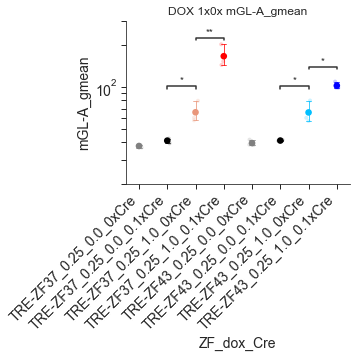

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF43_0.25_1.0_0xCre v.s. TRE-ZF43_0.25_1.0_0.1xCre: t-test independent samples, P_val=8.723e-01 stat=-1.713e-01


<Figure size 432x288 with 0 Axes>

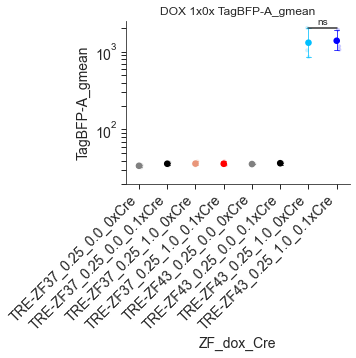

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF37_0.25_1.0_0xCre v.s. TRE-ZF37_0.25_1.0_0.1xCre: t-test independent samples, P_val=5.921e-01 stat=-5.815e-01


<Figure size 432x288 with 0 Axes>

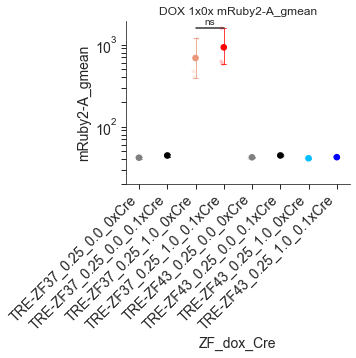

<Figure size 432x288 with 0 Axes>

In [11]:
# DOX uses 
conds_hueorder = {
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF37_0.25_1.0_0xCre': 'darksalmon', 
    'TRE-ZF37_0.25_1.0_0.1xCre': 'red',
    'TRE-ZF43_0.25_0.0_0xCre': 'grey',
    'TRE-ZF43_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF43_0.25_1.0_0xCre': 'deepskyblue',
    'TRE-ZF43_0.25_1.0_0.1xCre': 'blue'
}
x = 'ZF_dox_Cre'

data_now = s[ s['reporter'].isin(pd.array(['pTET021_203bp 0.1xCre', 'pTET021_203bp 0xCre'], dtype=object))]
data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]

#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean', 'TagBFP-A_gmean', 'mRuby2-A_gmean']
#repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF_dox_Cre'; x_rot = 45
hue = None;  hueorder = None; 
palette = conds_hueorder
order = conds_hueorder

yscales = pd.array(['log'])
ylim = [2e1, 3e2]
xsize =4  ; ysize = 3
fontsize = 14


for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
        yscale = yscale_now
        pairs = []
        if stat == 'mGL-A_gmean':
            pairs = [ ['TRE-ZF43_0.25_0.0_0.1xCre','TRE-ZF43_0.25_1.0_0xCre'], 
            ['TRE-ZF43_0.25_1.0_0xCre', 'TRE-ZF43_0.25_1.0_0.1xCre'], 
            ['TRE-ZF37_0.25_0.0_0.1xCre', 'TRE-ZF37_0.25_1.0_0xCre' ], 
            ['TRE-ZF37_0.25_1.0_0xCre', 'TRE-ZF37_0.25_1.0_0.1xCre']]
        if stat == 'TagBFP-A_gmean':
            pairs = [ ['TRE-ZF43_0.25_1.0_0xCre', 'TRE-ZF43_0.25_1.0_0.1xCre']]
        if stat == 'mRuby2-A_gmean':
            pairs = [['TRE-ZF37_0.25_1.0_0xCre', 'TRE-ZF37_0.25_1.0_0.1xCre']]
        plottitle = 'DOX 1x0x' + ' ' + stat
        g = plt.figure(figsize=(xsize,ysize))
        g = summary_plot( x, y, hue, data=data_now, dodge=False, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                ylim = ylim, fontsize=fontsize, pairs=pairs,
                                    )
        g =g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF37_0.25_0.0_0.1xCre v.s. TRE-ZF37_0.25_1.0_0xCre: t-test independent samples, P_val=2.463e-02 stat=-3.512e+00
TRE-ZF37_0.25_1.0_0xCre v.s. TRE-ZF37_0.25_1.0_0.1xCre: t-test independent samples, P_val=6.792e-03 stat=-5.140e+00


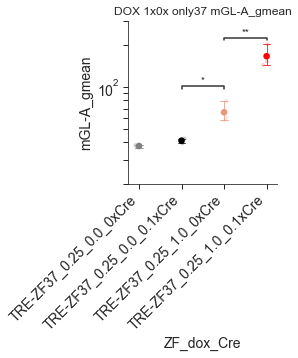

<Figure size 432x288 with 0 Axes>

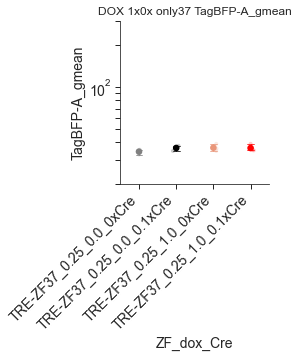

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF37_0.25_1.0_0xCre v.s. TRE-ZF37_0.25_1.0_0.1xCre: t-test independent samples, P_val=5.921e-01 stat=-5.815e-01


<Figure size 432x288 with 0 Axes>

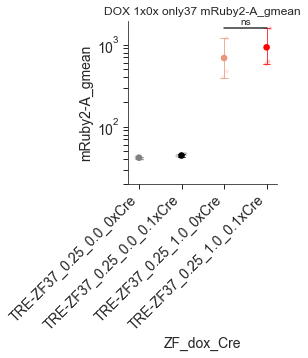

<Figure size 432x288 with 0 Axes>

In [12]:
# DOX uses 
conds_hueorder = {
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF37_0.25_1.0_0xCre': 'darksalmon', 
    'TRE-ZF37_0.25_1.0_0.1xCre': 'red',
}


data_now = s[ s['reporter'].isin(pd.array(['pTET021_203bp 0.1xCre', 'pTET021_203bp 0xCre'], dtype=object))]
data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]

#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean', 'TagBFP-A_gmean', 'mRuby2-A_gmean']
#repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF_dox_Cre'; x_rot = 45
hue = None;  hueorder = None; 
palette = conds_hueorder
order = conds_hueorder

yscales = pd.array(['log'])
ylim = [2e1, 3e2]
xsize =4 /3*2  ; ysize = 3
fontsize = 14


for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
        yscale = yscale_now
        pairs = []
        if stat == 'mGL-A_gmean':
            pairs = [ 
            ['TRE-ZF37_0.25_0.0_0.1xCre', 'TRE-ZF37_0.25_1.0_0xCre' ], 
            ['TRE-ZF37_0.25_1.0_0xCre', 'TRE-ZF37_0.25_1.0_0.1xCre']]
        if stat == 'mRuby2-A_gmean':
            pairs = [['TRE-ZF37_0.25_1.0_0xCre', 'TRE-ZF37_0.25_1.0_0.1xCre']]
        plottitle = 'DOX 1x0x' + ' only37 ' + stat
        g = plt.figure(figsize=(xsize,ysize))
        g = summary_plot( x, y, hue, data=data_now, dodge=False, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                ylim = ylim, fontsize=fontsize, pairs=pairs,
                                    )
        g =g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF43_0.25_0.0_0.1xCre v.s. TRE-ZF43_0.25_1.0_0xCre: t-test independent samples, P_val=2.776e-02 stat=-3.381e+00
TRE-ZF43_0.25_1.0_0xCre v.s. TRE-ZF43_0.25_1.0_0.1xCre: t-test independent samples, P_val=1.031e-02 stat=-4.564e+00


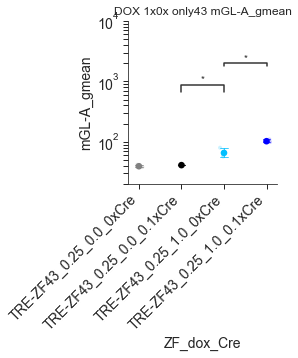

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

TRE-ZF43_0.25_1.0_0xCre v.s. TRE-ZF43_0.25_1.0_0.1xCre: t-test independent samples, P_val=8.723e-01 stat=-1.713e-01


<Figure size 432x288 with 0 Axes>

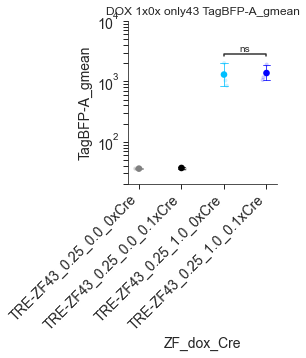

<Figure size 432x288 with 0 Axes>

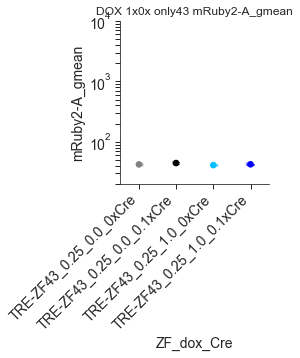

<Figure size 432x288 with 0 Axes>

In [19]:
# DOX uses 
conds_hueorder = {
    'TRE-ZF43_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF43_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF43_0.25_1.0_0xCre': 'deepskyblue', 
    'TRE-ZF43_0.25_1.0_0.1xCre': 'blue',
}


data_now = s[ s['reporter'].isin(pd.array(['pTET021_203bp 0.1xCre', 'pTET021_203bp 0xCre'], dtype=object))]
data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]

#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean', 'TagBFP-A_gmean', 'mRuby2-A_gmean']
#repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF_dox_Cre'; x_rot = 45
hue = None;  hueorder = None; 
palette = conds_hueorder
order = conds_hueorder

yscales = pd.array(['log'])
ylim = [2e1, 1e4]
xsize =4 /3*2  ; ysize = 3
fontsize = 14


for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
        yscale = yscale_now
        pairs = []
        if stat == 'mGL-A_gmean':
            pairs = [ 
            ['TRE-ZF43_0.25_0.0_0.1xCre', 'TRE-ZF43_0.25_1.0_0xCre' ], 
            ['TRE-ZF43_0.25_1.0_0xCre', 'TRE-ZF43_0.25_1.0_0.1xCre']]
        if stat == 'TagBFP-A_gmean':
            pairs = [['TRE-ZF43_0.25_1.0_0xCre', 'TRE-ZF43_0.25_1.0_0.1xCre']]
        plottitle = 'DOX 1x0x' + ' only43 ' + stat
        g = plt.figure(figsize=(xsize,ysize))
        g = summary_plot( x, y, hue, data=data_now, dodge=False, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                ylim = ylim, fontsize=fontsize, pairs=pairs,
                                    )
        g =g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Calculate Fold Change and Plot 

In [ ]:
s_noCre_map  = {'test':'test'}
s['cond_biorep'] = s['ZF'] +  s['bioreplicate']
conds = pd.unique(s['cond_biorep'])
doxs = pd.unique( s['doxycyclin'])

for cond in conds: 
    data_now = s[ s['cond_biorep'] == cond] 
    data_now = data_now[ s['doxycyclin']==doxs[-1]]
    mGL_noCre = data_now[ data_now['Cre'] == '0xCre']['mGL-A_gmean'].iloc[0]
    s_noCre_map[cond] = mGL_noCre

s['noCre'] = s['cond_biorep'].map(s_noCre_map)
s['Fold Change'] = s['mGL-A_gmean'] / s['noCre']

In [ ]:
# DOX uses 
conds_hueorder = {
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF37_0.25_1.0_0xCre': 'darksalmon', 
    'TRE-ZF37_0.25_1.0_0.1xCre': 'red',
    'TRE-ZF43_0.25_0.0_0xCre': 'grey',
    'TRE-ZF43_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF43_0.25_1.0_0xCre': 'deepskyblue',
    'TRE-ZF43_0.25_1.0_0.1xCre': 'blue'
}

data_now = s[ s['reporter'].isin(pd.array(['pTET021_203bp 0.1xCre', 'pTET021_203bp 0xCre'], dtype=object))]
data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]

#Plot the summary stats of mean and g.mean 
x = 'ZF_dox_Cre'; x_rot = 45
hue = None;  hueorder = None; 
palette = conds_hueorder
order = conds_hueorder

yscales = pd.array(['linear'])
ylim = [0,3]
xsize =4  ; ysize = 3
fontsize = 14

y = 'Fold Change'
pairs = []
plottitle = 'DOX 1x0x' + ' ' + y
yscale = 'linear'
g = plt.figure(figsize=(xsize,ysize))
plt.axhline(y=1, ls='--', color='gray')
g = summary_plot( x, y, hue, data=data_now, dodge=False, palette = palette, order=order, 
                        hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                        ylim = ylim, fontsize=fontsize, pairs=pairs, scientific=False,
                            )
g =g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
# DOX uses 
conds_hueorder = {
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF37_0.25_1.0_0xCre': '#C3DB9A', 
    'TRE-ZF37_0.25_1.0_0.1xCre': '#69B645',
}

data_now = s[ s['reporter'].isin(pd.array(['pTET021_203bp 0.1xCre', 'pTET021_203bp 0xCre'], dtype=object))]
data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]

#Plot the summary stats of mean and g.mean 
x = 'ZF_dox_Cre'; x_rot = 45
hue = None;  hueorder = None; 
palette = conds_hueorder
order = conds_hueorder

yscales = pd.array(['linear'])
ylim = [0,3]
xsize =4/3*2 ; ysize = 3
fontsize = 14

y = 'Fold Change'
pairs = []
plottitle = 'DOX 1x0x' + ' 37only ' + y
g = plt.figure(figsize=(xsize,ysize))
plt.axhline(y=1, ls='--', color='#C3DB9A')
g = summary_plot( x, y, hue, data=data_now, dodge=False, palette = palette, order=order, 
                        hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                        ylim = ylim, fontsize=fontsize, pairs=pairs, scientific=False,
                            )
g =g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

### Mean Fold Change

In [ ]:
df = s

by = ['ZF_dox_Cre'] #how to filter results, columns
x = ['Fold Change'] #which parameter to calculate results on
stat = [np.mean] #statistics to calculate
s_fold_change_means = calc_stats(df,by,x,stat)

display(s_fold_change_means[s_fold_change_means['ZF_dox_Cre'].isin(conds_hueorder) ])

# Histograms 1D

In [ ]:
ZFs = pd.array( ['TRE-ZF43_0.25', 'TRE-ZF37_0.25'])
#Set common conditions
xlim = [1e0,1e4]; hue='cond'; 
xsize = 2.5
ysize = 1.5
hue = 'ZF_dox_Cre'
hueorder = None 
palette= {'TRE-ZF43_0.25_0.0_0xCre': 'grey',
    'TRE-ZF43_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF43_0.25_1.0_0xCre': 'deepskyblue',
    'TRE-ZF43_0.25_1.0_0.1xCre': 'blue', 
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_0.0_0.1xCre': 'black', 
    'TRE-ZF37_0.25_1.0_0xCre': 'darksalmon', 
    'TRE-ZF37_0.25_1.0_0.1xCre': 'red'
}
conds_hueorder=palette

for ZF in ZFs: 
    
    data_now = data_iRFP670gated[ data_iRFP670gated['ZF']==ZF]
    data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]
    
    xlim = [1e0,1e4];
    parameters = pd.array(['mGL-A'])
    plottitle = 'hist mGL' + ZF
    g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                            alpha=0.15,
                            legendtitle='Condition', xlim=xlim, legend=False)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    xlim = [1e0,1e6];
    parameters = pd.array(['mRuby2-A'])
    plottitle = 'hist mCherry' + ZF
    g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                            alpha=0.15,
                            legendtitle='Condition', xlim=xlim, legend=False)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    xlim = [1e0,1e6]
    parameters = pd.array(['TagBFP-A'])
    plottitle = 'hist TagBFP' + ZF
    g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                            alpha=0.15,
                            legendtitle='Condition', xlim=xlim, legend=False)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
ZFs = pd.array( ['TRE-ZF43_0.25', 'TRE-ZF37_0.25'])
#Set common conditions
parameters = pd.array(['mGL-A']) ;  xlim = [1e0,1e4]; hue='cond'; hueorder=palette
xsize = 2.5
ysize = 1.5
hue = 'ZF_dox_Cre'
hueorder = None 
palette= {'TRE-ZF43_0.25_0.0_0xCre': 'grey',
    'TRE-ZF43_0.25_1.0_0xCre': '#C3DB9A',
    'TRE-ZF43_0.25_1.0_0.1xCre': '#69B645', 
    'TRE-ZF37_0.25_0.0_0xCre': 'grey', 
    'TRE-ZF37_0.25_1.0_0xCre': '#C3DB9A', 
    'TRE-ZF37_0.25_1.0_0.1xCre': '#69B645'
}
conds_hueorder=palette

for ZF in ZFs: 
    data_now = data_iRFP670gated[ data_iRFP670gated['ZF']==ZF]
    data_now = data_now[ data_now['ZF_dox_Cre'].isin(conds_hueorder) ]
    plottitle = 'hist ' + ZF + ' GREEN'
    g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                            alpha=0.15,
                            legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')